Contaminated_data.shape: (1000, 4000)
Clean_data.shape: (1000, 4000)


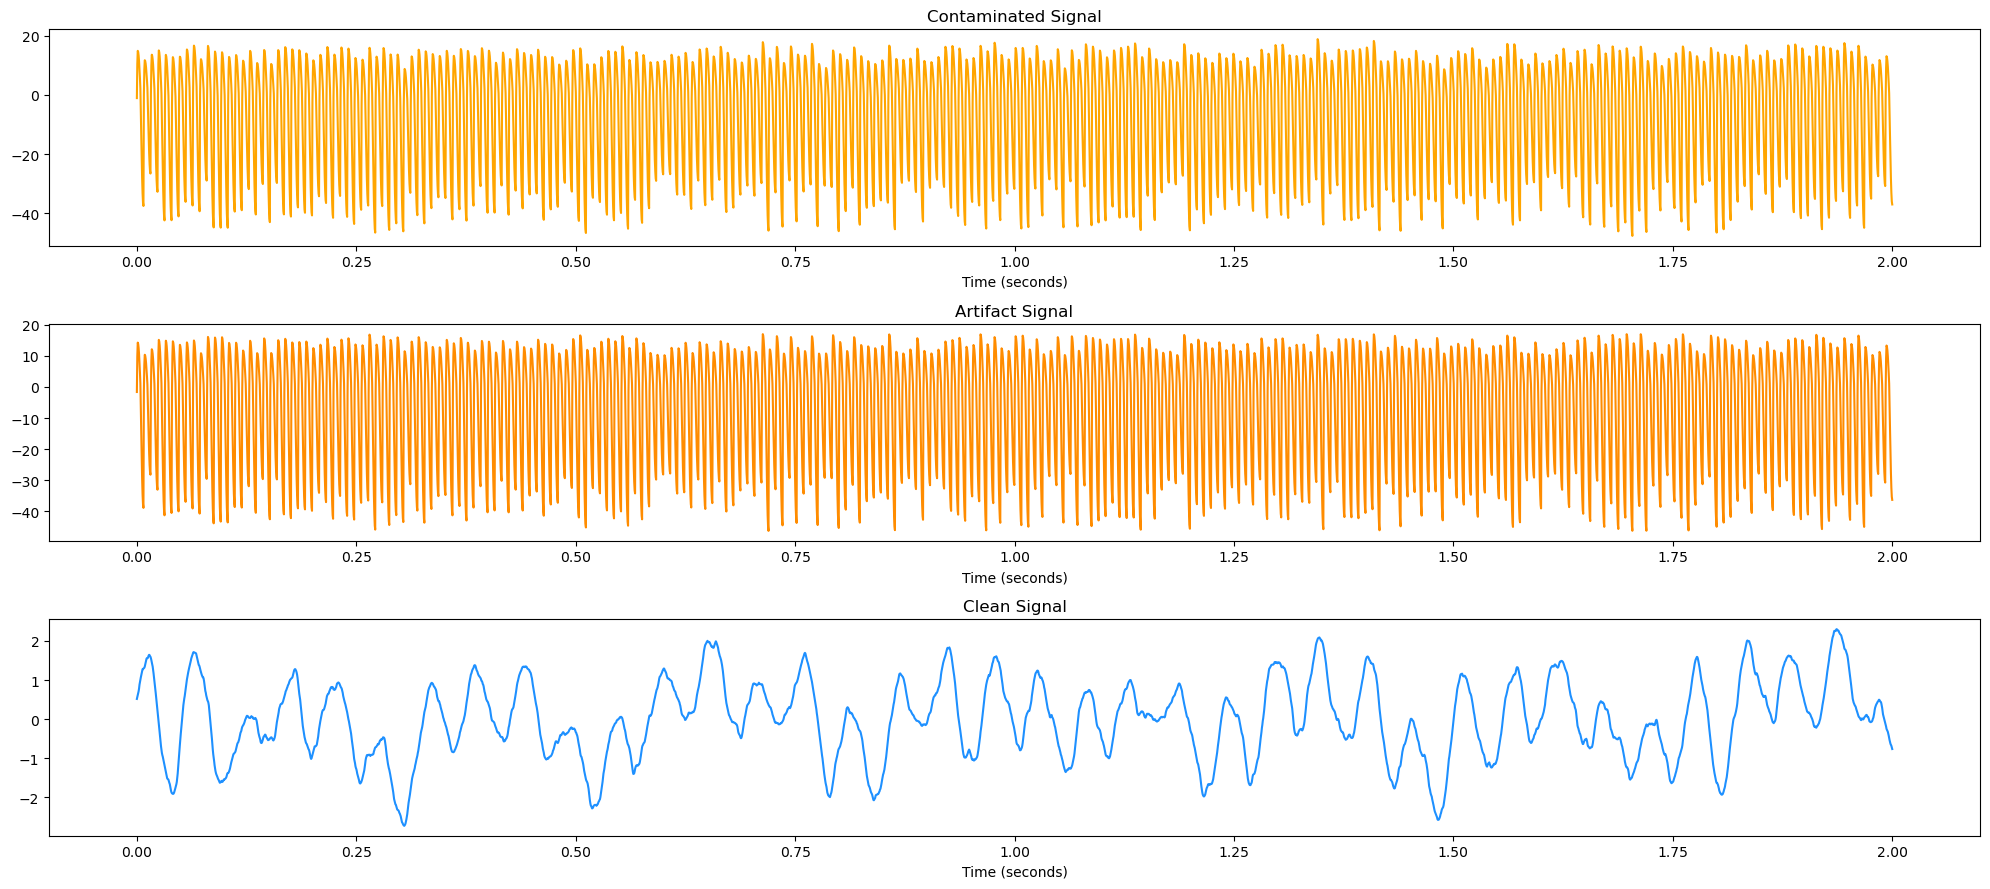

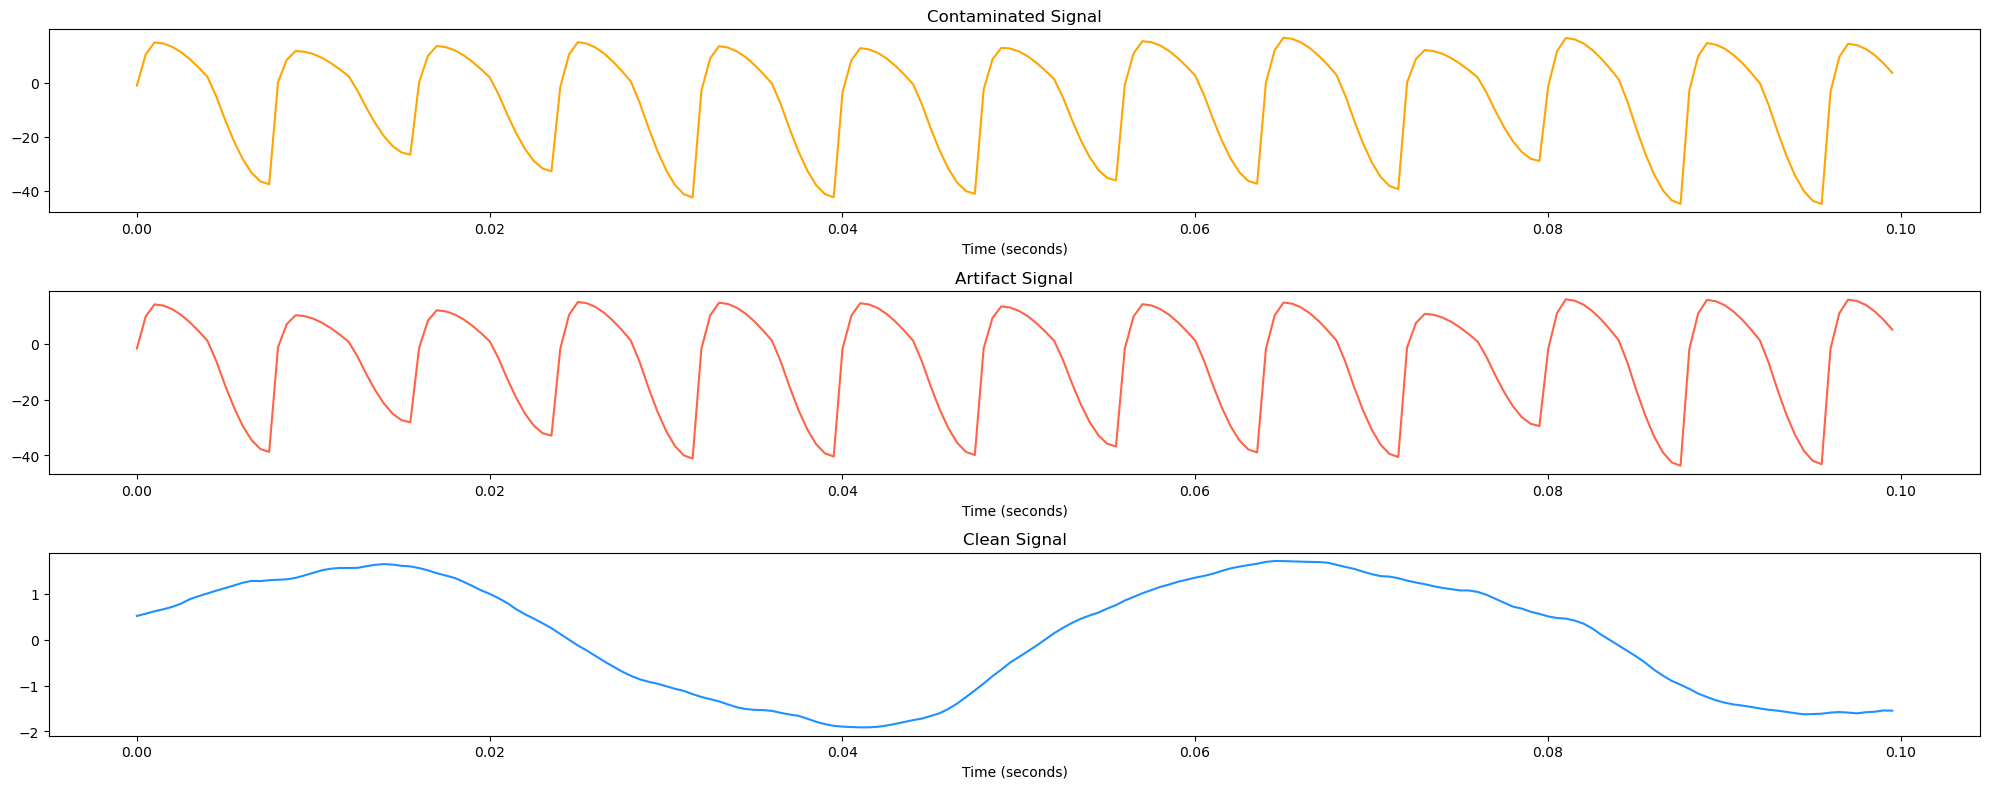

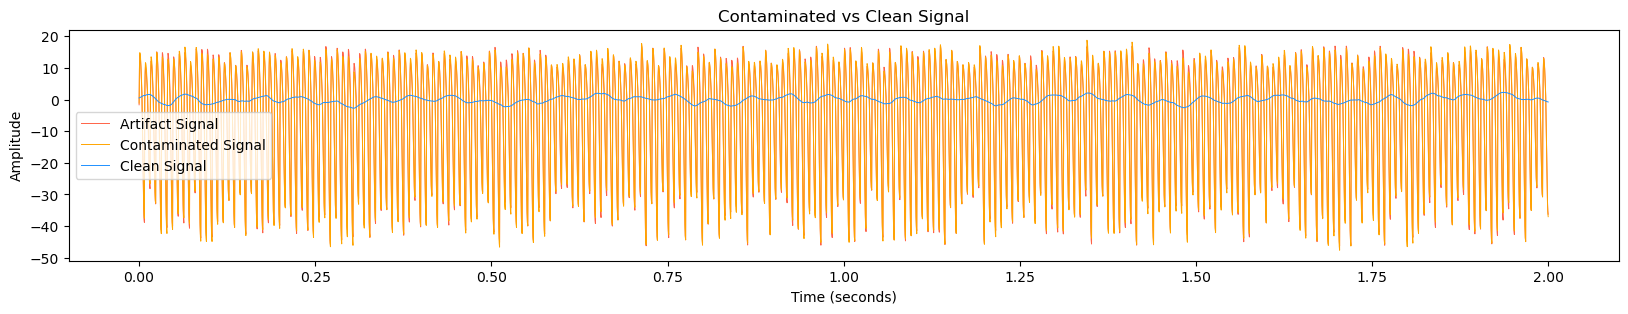

In [33]:
# 데이터 load & plot

import sys
sys.path.append('../../../tool_code/plot/') # "~~/tool_code/plot/" (상대 경로)

from DataLoad import Data_Load_Plot, Result_Plot

datapath='../../../data/synthetic_data/'

Contaminated_data, Clean_data, Artifact_data = Data_Load_Plot(datapath)

<Time Domain Error>s
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


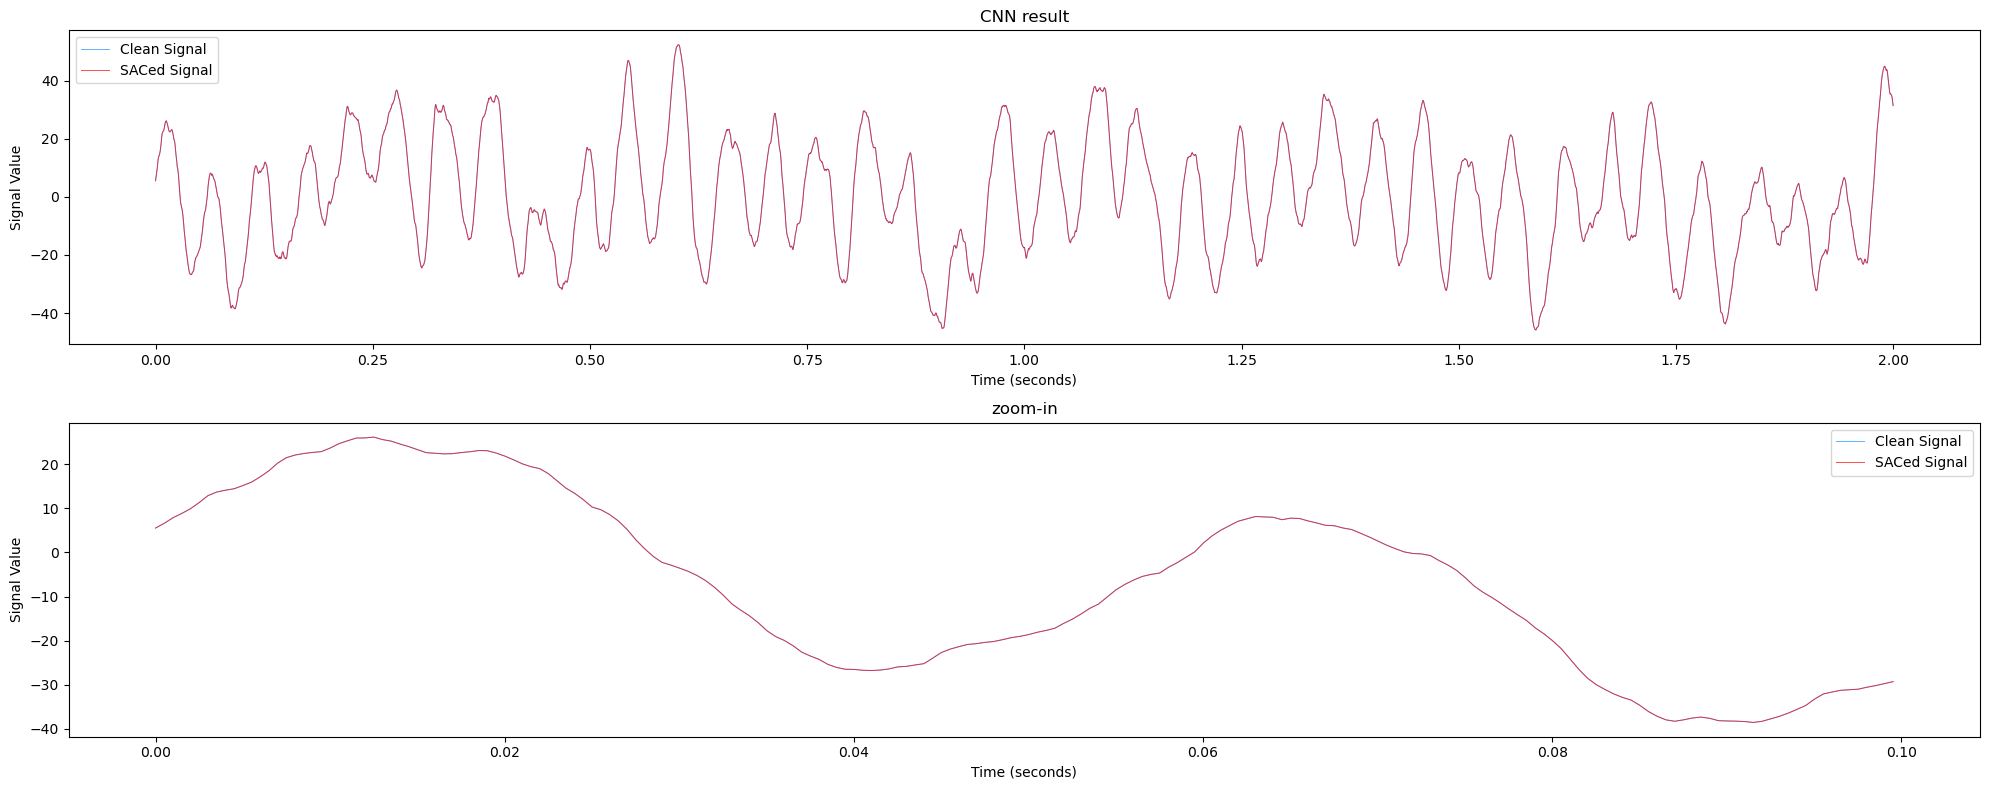

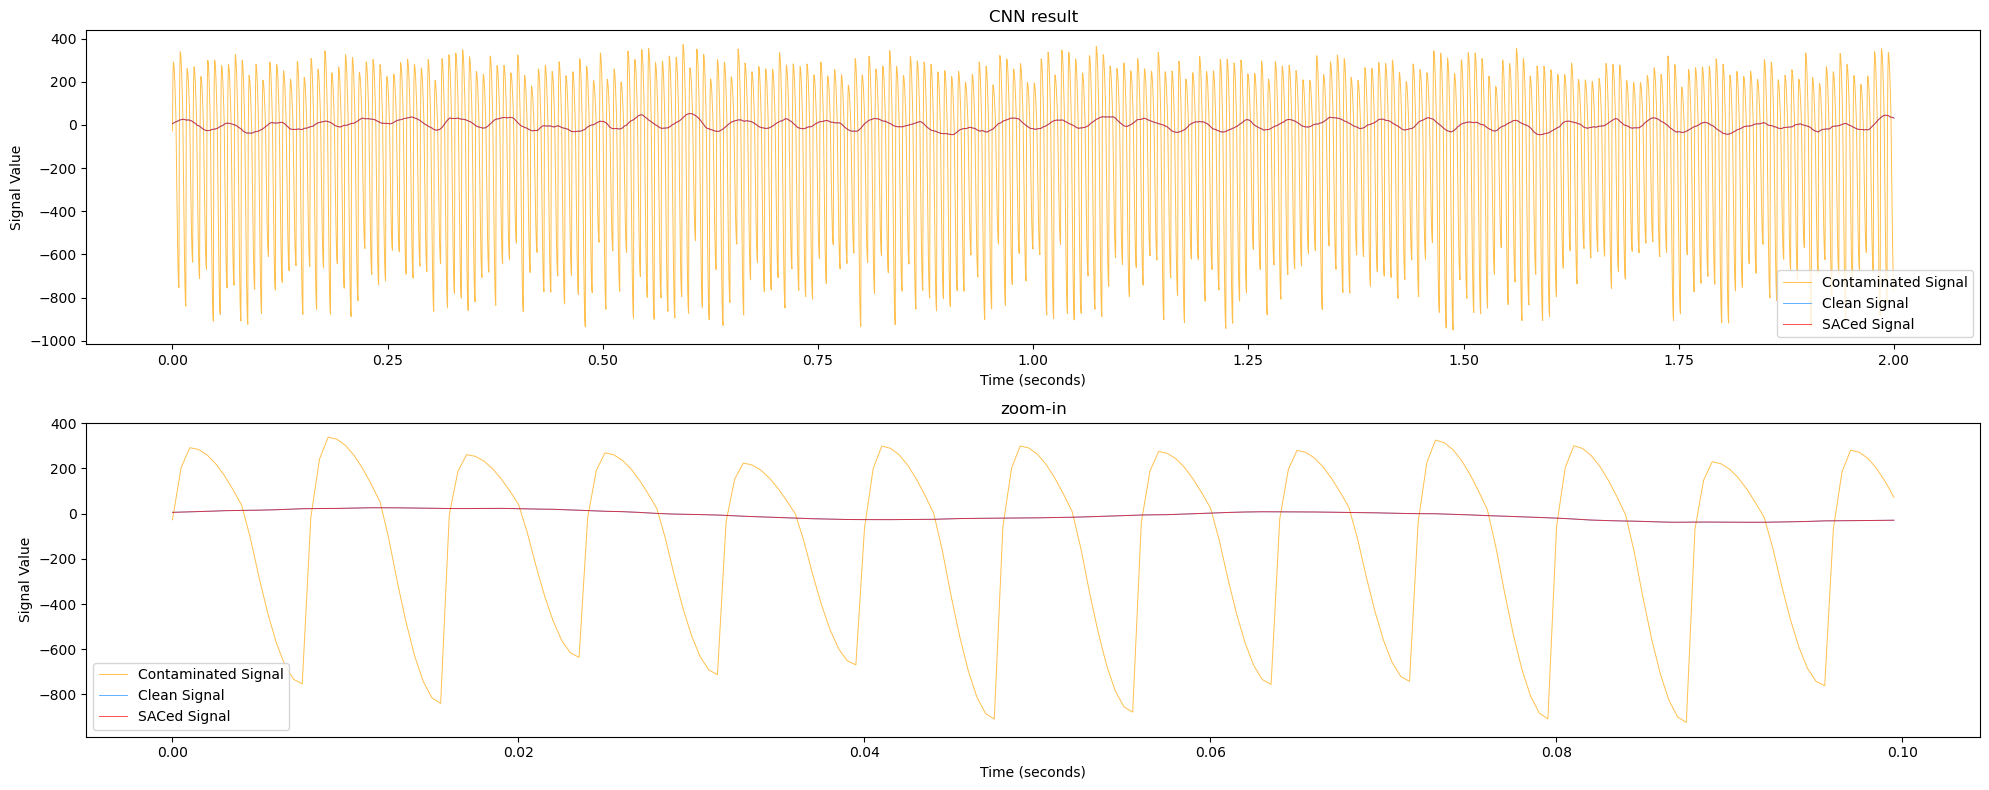

<Frequency Domain Error>
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


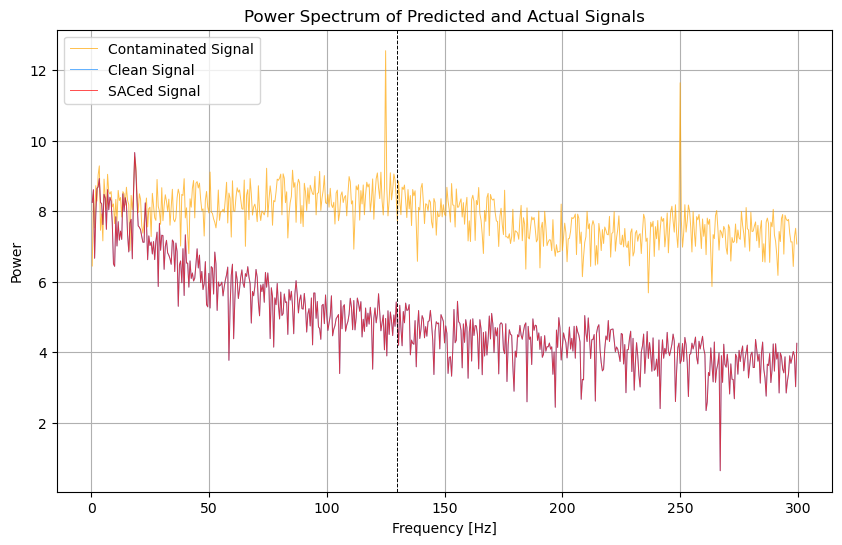

In [34]:
Contam = Contaminated_data[117]*20
Clean = Clean_data[117]*20

Result_Plot(Contam, Clean, Clean)

<Time Domain Error>s
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


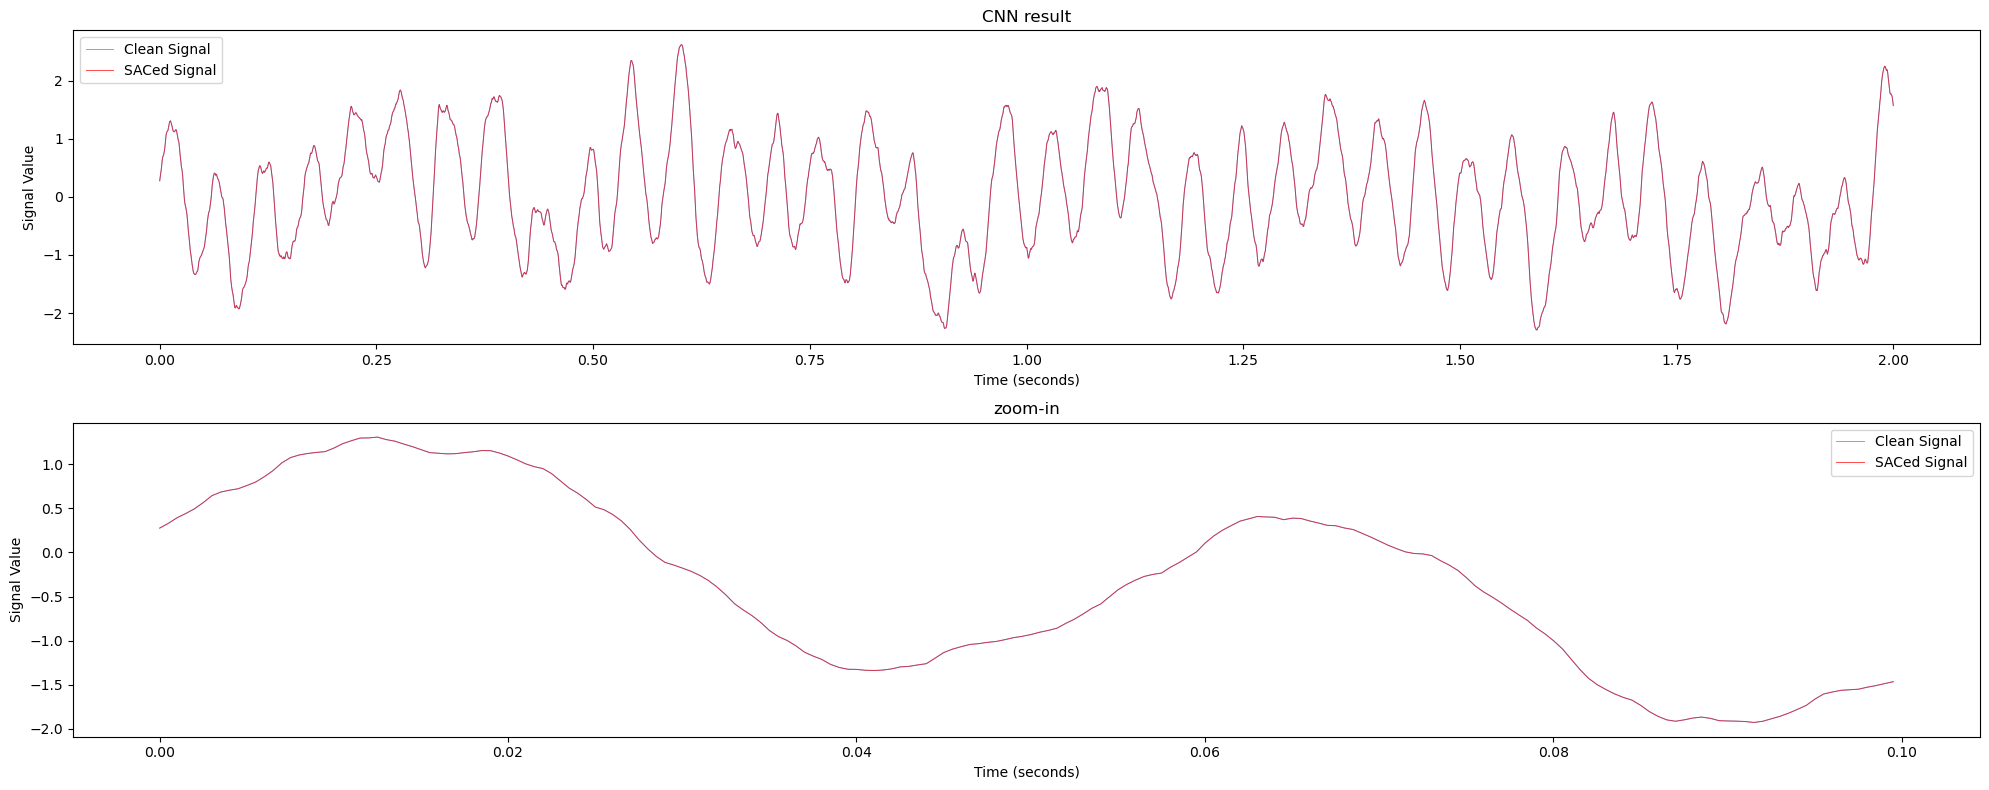

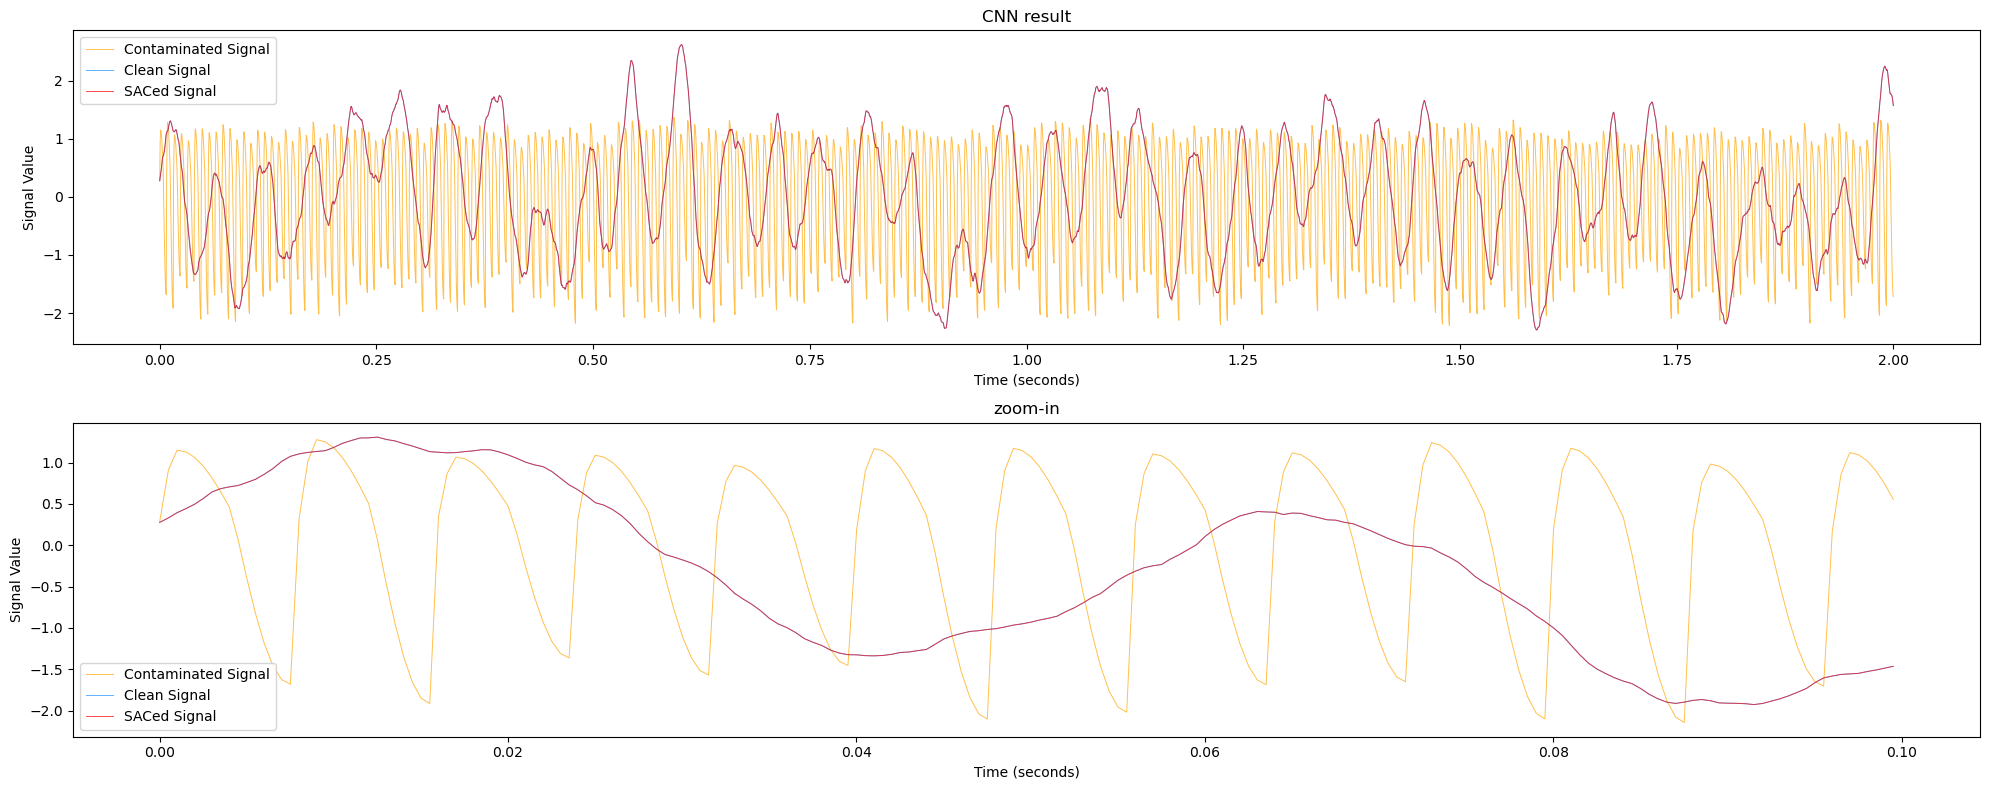

<Frequency Domain Error>
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


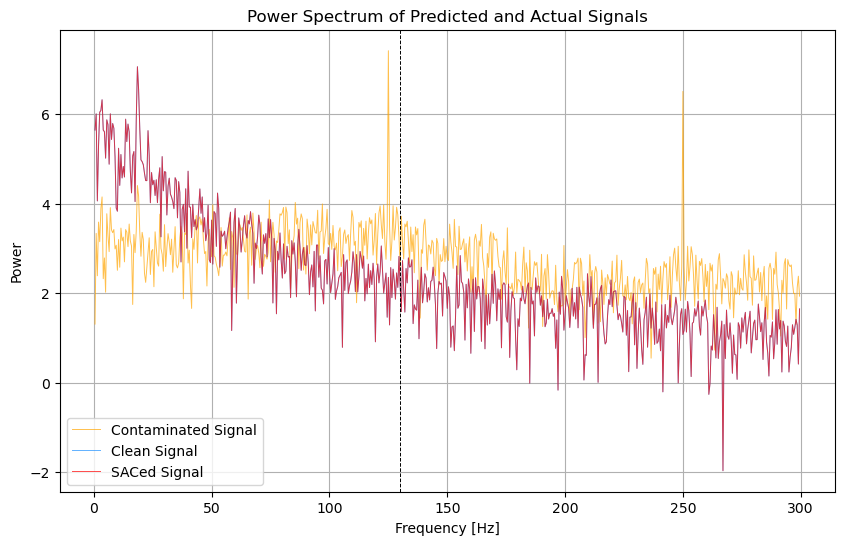

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_Contam = scaler_x.fit_transform(Contam.reshape(-1, 1))
scaled_Clean = scaler_y.fit_transform(Clean.reshape(-1, 1))

Result_Plot(scaled_Contam.squeeze(), scaled_Clean.squeeze(), scaled_Clean.squeeze())

<Time Domain Error>s
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


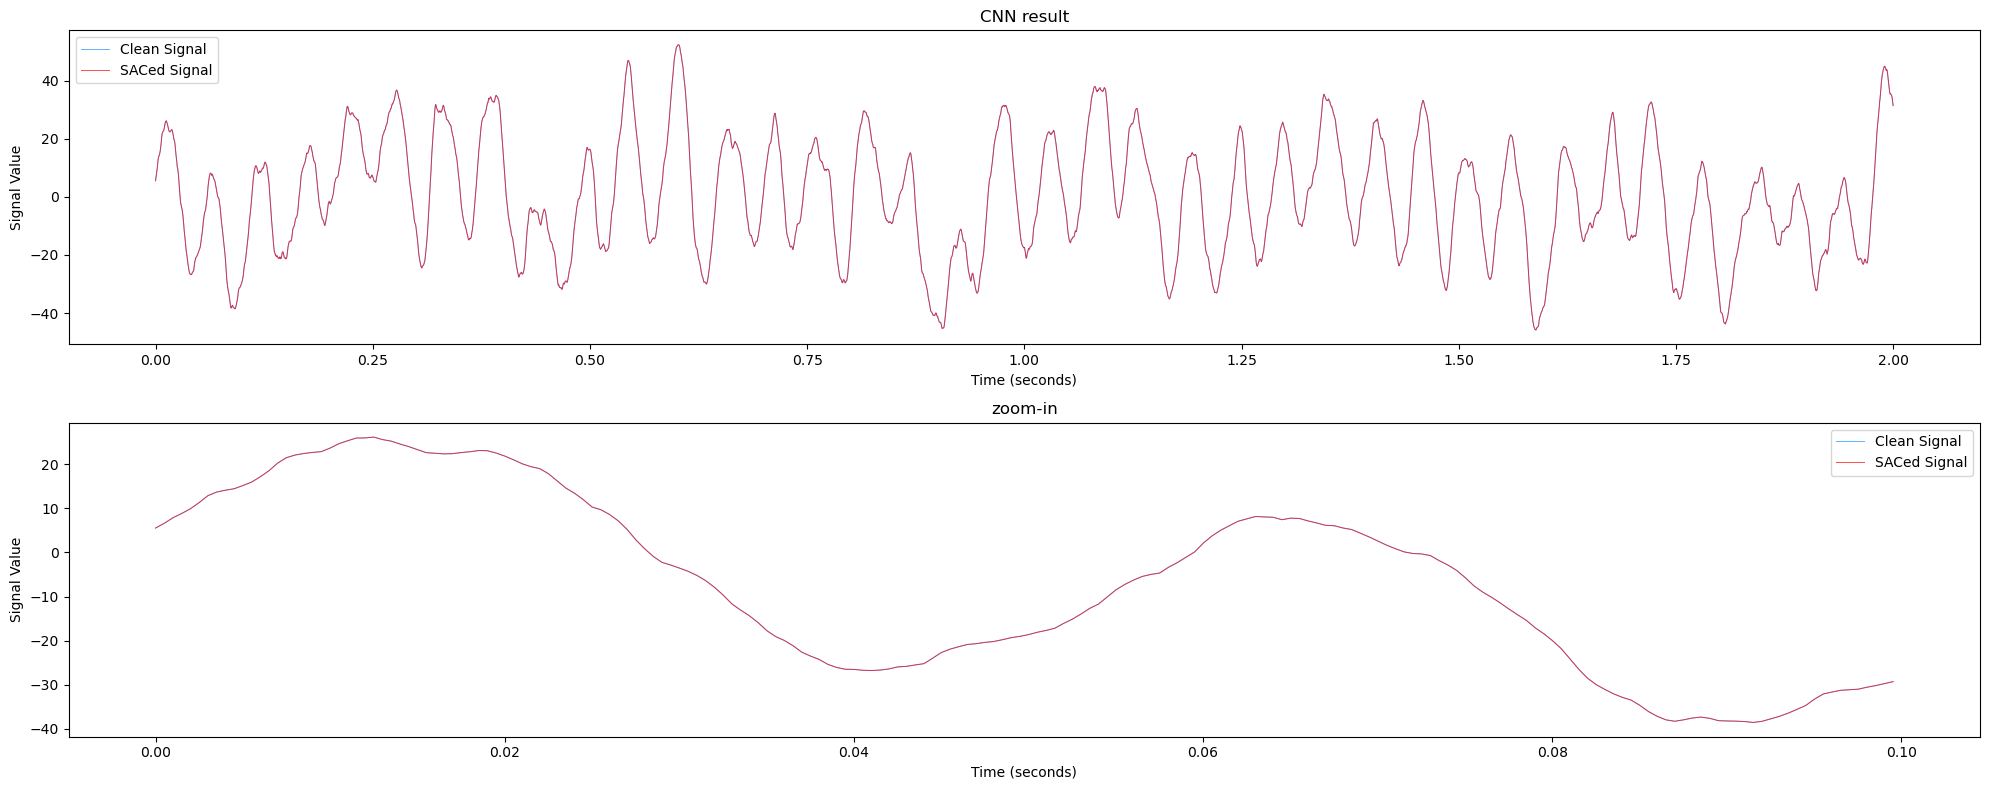

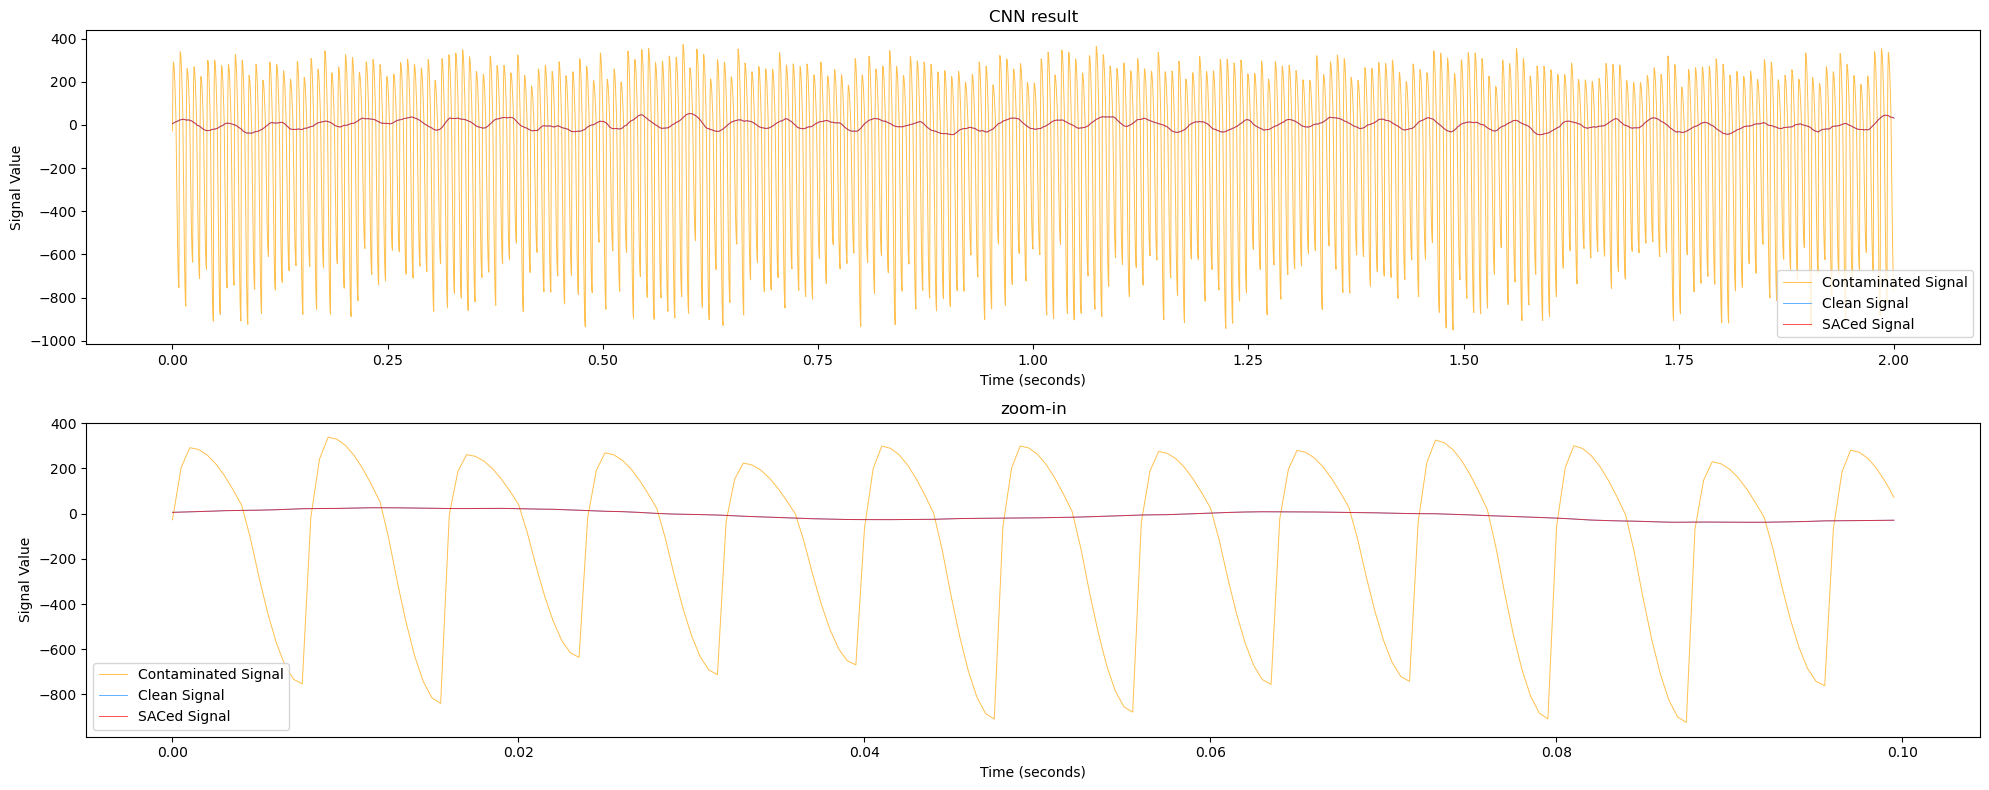

<Frequency Domain Error>
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


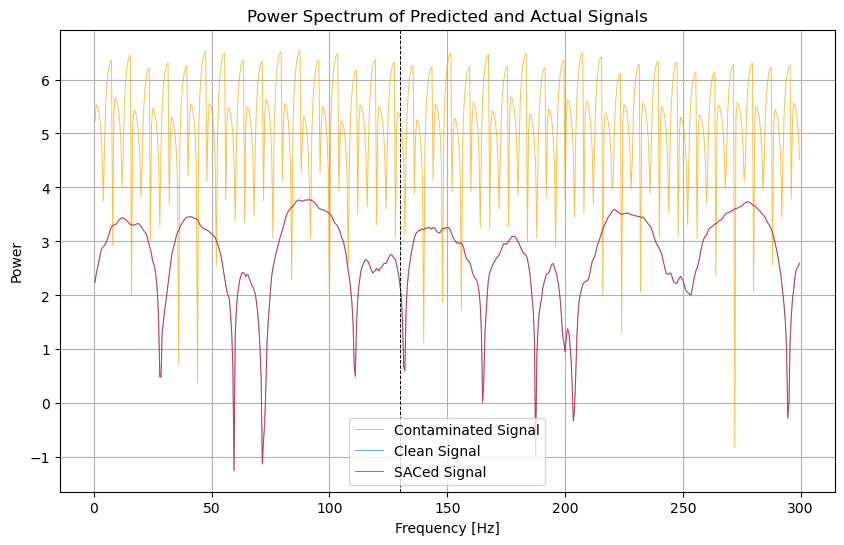

In [36]:
reversed_Contam = scaler_x.inverse_transform(scaled_Contam)
reversed_Clean = scaler_y.inverse_transform(scaled_Clean)

Result_Plot(reversed_Contam, reversed_Clean, reversed_Clean)

< Error btw [Clean vs scaled_Clean] >
Mean Absolute Error: 15.89281304388093
Mean Squared Error: 361.0

< Error btw [Clean vs reversed_Clean] >
Mean Absolute Error: 2.9644689480967654e-17
Mean Squared Error: 2.3456683201732052e-32


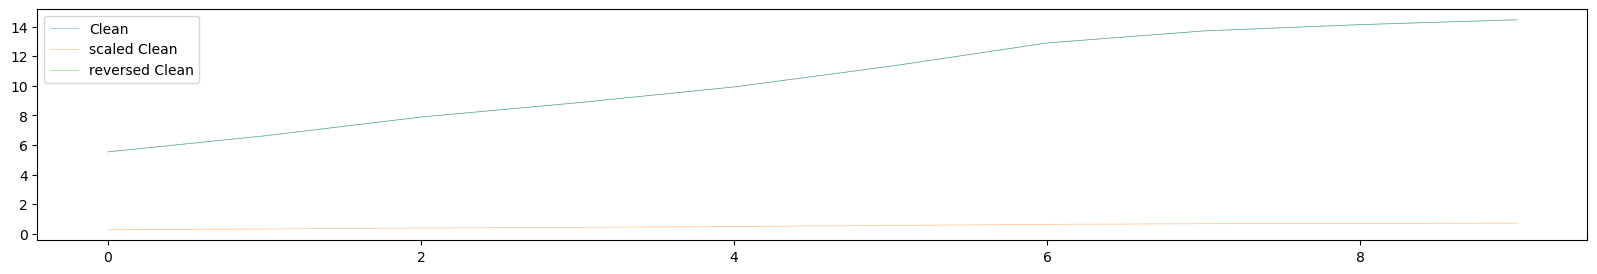

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("< Error btw [Clean vs scaled_Clean] >")
print(f"Mean Absolute Error: {mean_absolute_error(Clean, scaled_Clean)}")
print(f"Mean Squared Error: {mean_squared_error(Clean, scaled_Clean)}\n")

print("< Error btw [Clean vs reversed_Clean] >")
print(f"Mean Absolute Error: {mean_absolute_error(Clean, reversed_Clean)}")
print(f"Mean Squared Error: {mean_squared_error(Clean, reversed_Clean)}")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot(Clean[:10], label="Clean", alpha=0.5, lw=0.5)
plt.plot(scaled_Clean[:10], label="scaled Clean", alpha=0.5, lw=0.5)
plt.plot(reversed_Clean[:10], label="reversed Clean", alpha=0.5, lw=0.5)
plt.legend()

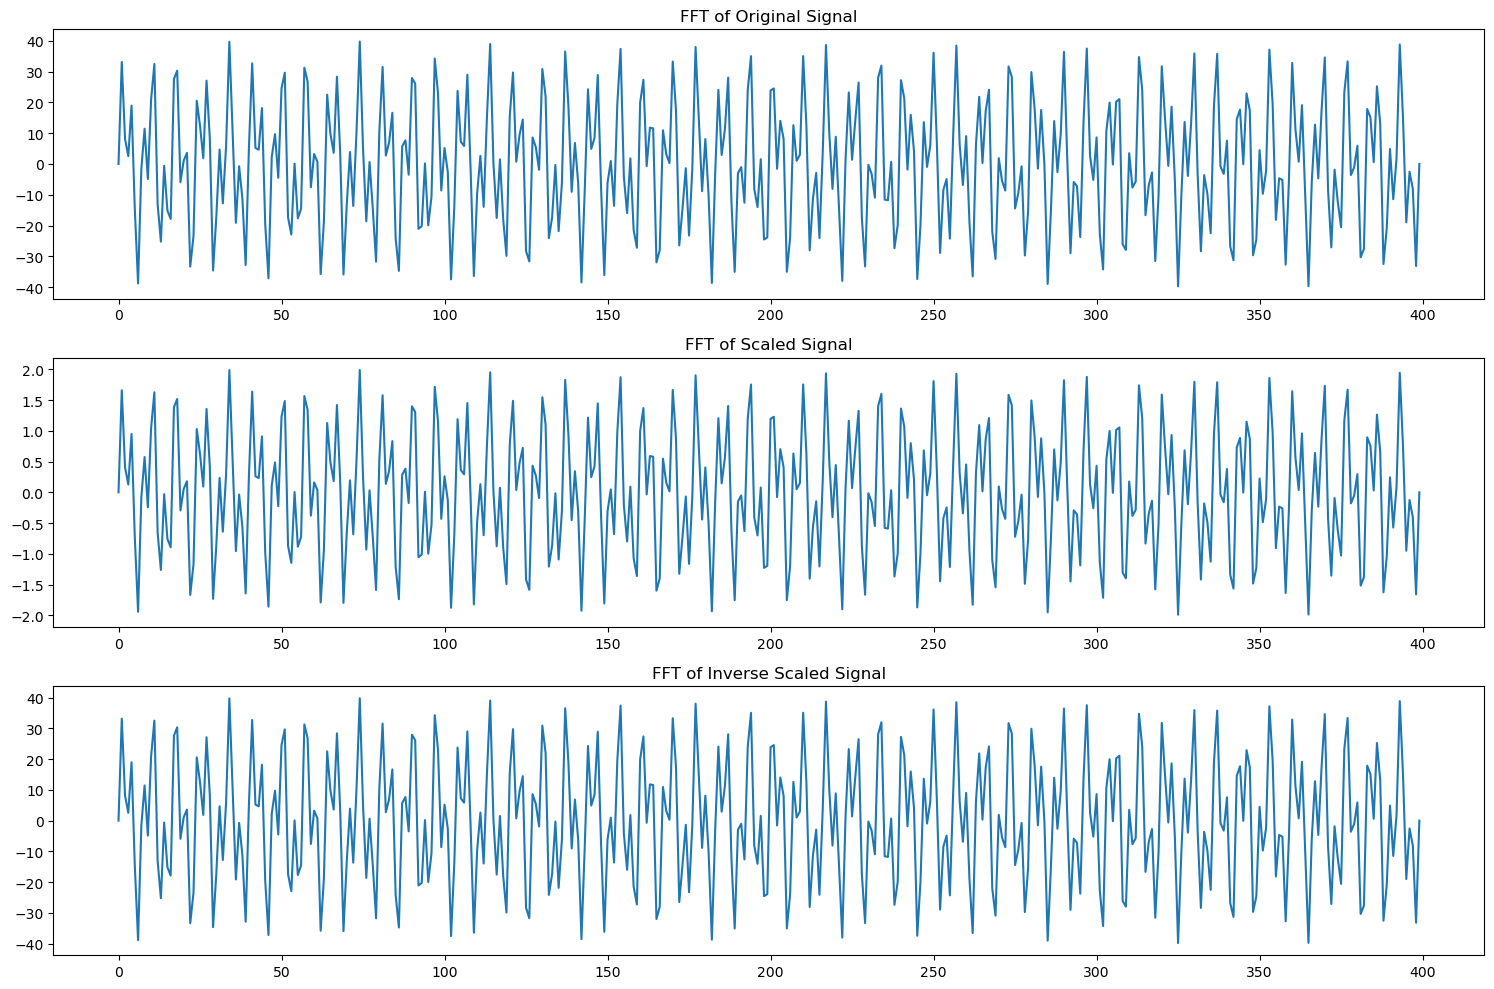

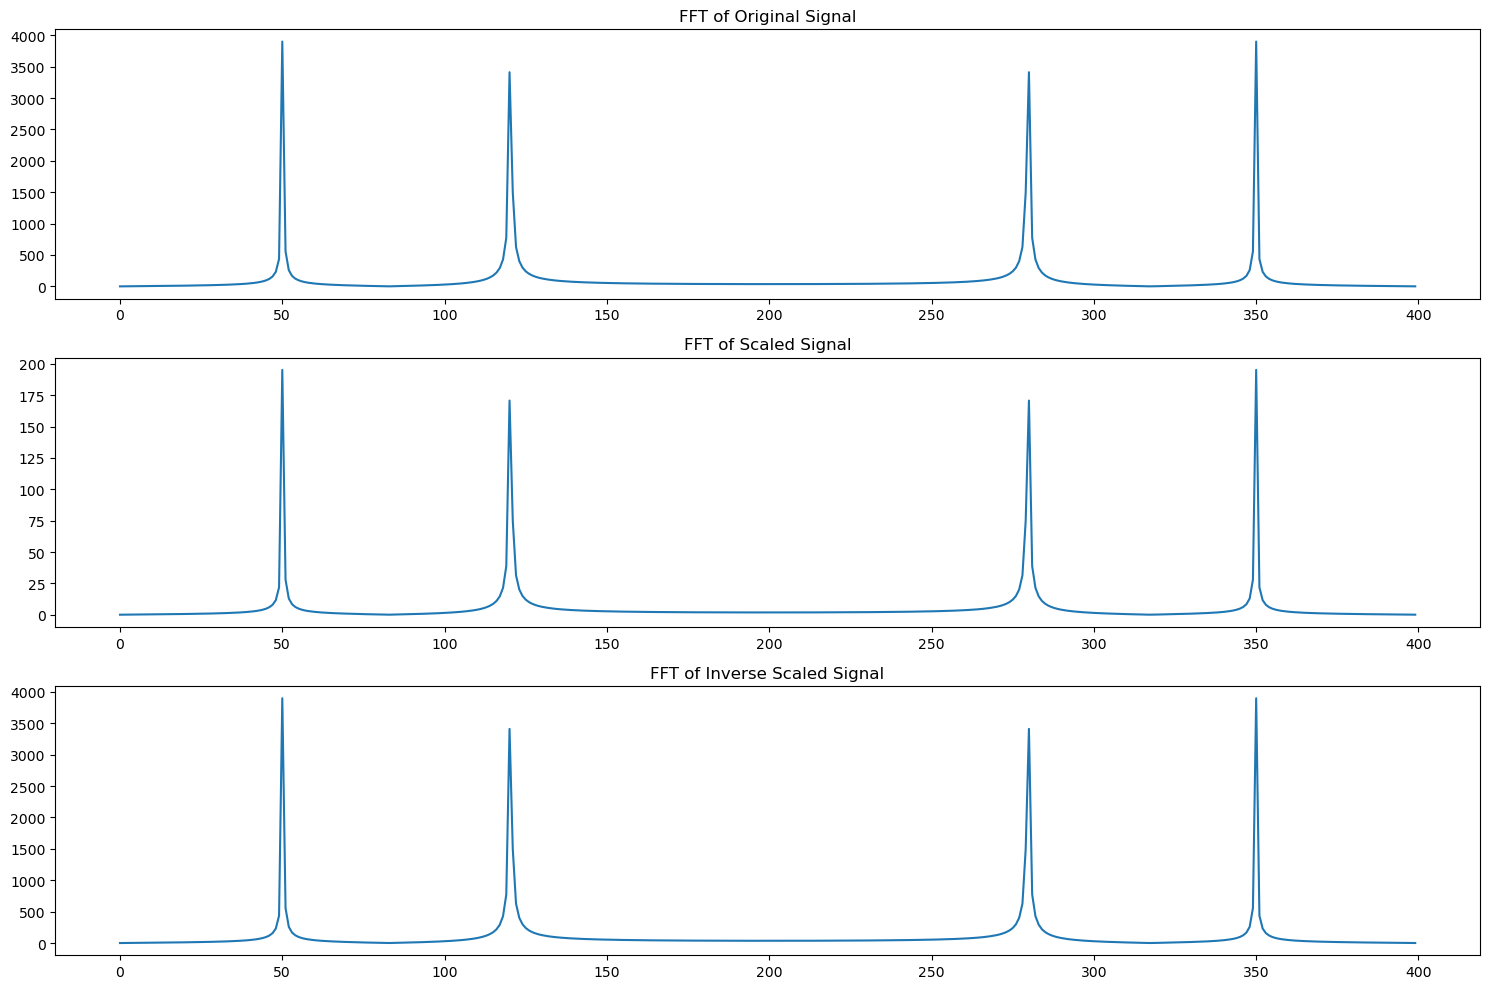

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.fft import fft, ifft

# 원래 신호 생성
t = np.linspace(0, 1, 400)
signal = (np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t))*20

# FFT 수행 (원래 신호)
fft_original = fft(signal)

# StandardScaler를 사용하여 스케일링
scaler = StandardScaler()
signal_scaled = scaler.fit_transform(signal.reshape(-1, 1)).flatten()

# FFT 수행 (스케일링된 신호)
fft_scaled = fft(signal_scaled)

# 역변환 수행
signal_inverse_scaled = scaler.inverse_transform(signal_scaled.reshape(-1, 1)).flatten()

# FFT 수행 (역변환된 신호)
fft_inverse_scaled = fft(signal_inverse_scaled)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('FFT of Original Signal')

plt.subplot(3, 1, 2)
plt.plot(signal_scaled)
plt.title('FFT of Scaled Signal')

plt.subplot(3, 1, 3)
plt.plot(signal_inverse_scaled)
plt.title('FFT of Inverse Scaled Signal')

plt.tight_layout()
plt.show()

# 결과 플롯
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(np.abs(fft_original))
plt.title('FFT of Original Signal')

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_scaled))
plt.title('FFT of Scaled Signal')

plt.subplot(3, 1, 3)
plt.plot(np.abs(fft_inverse_scaled))
plt.title('FFT of Inverse Scaled Signal')

plt.tight_layout()
plt.show()
